In [2]:
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096
...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,L53,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,L54,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,L55,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,L56,0.218561


## Heat map of the max H2 produced

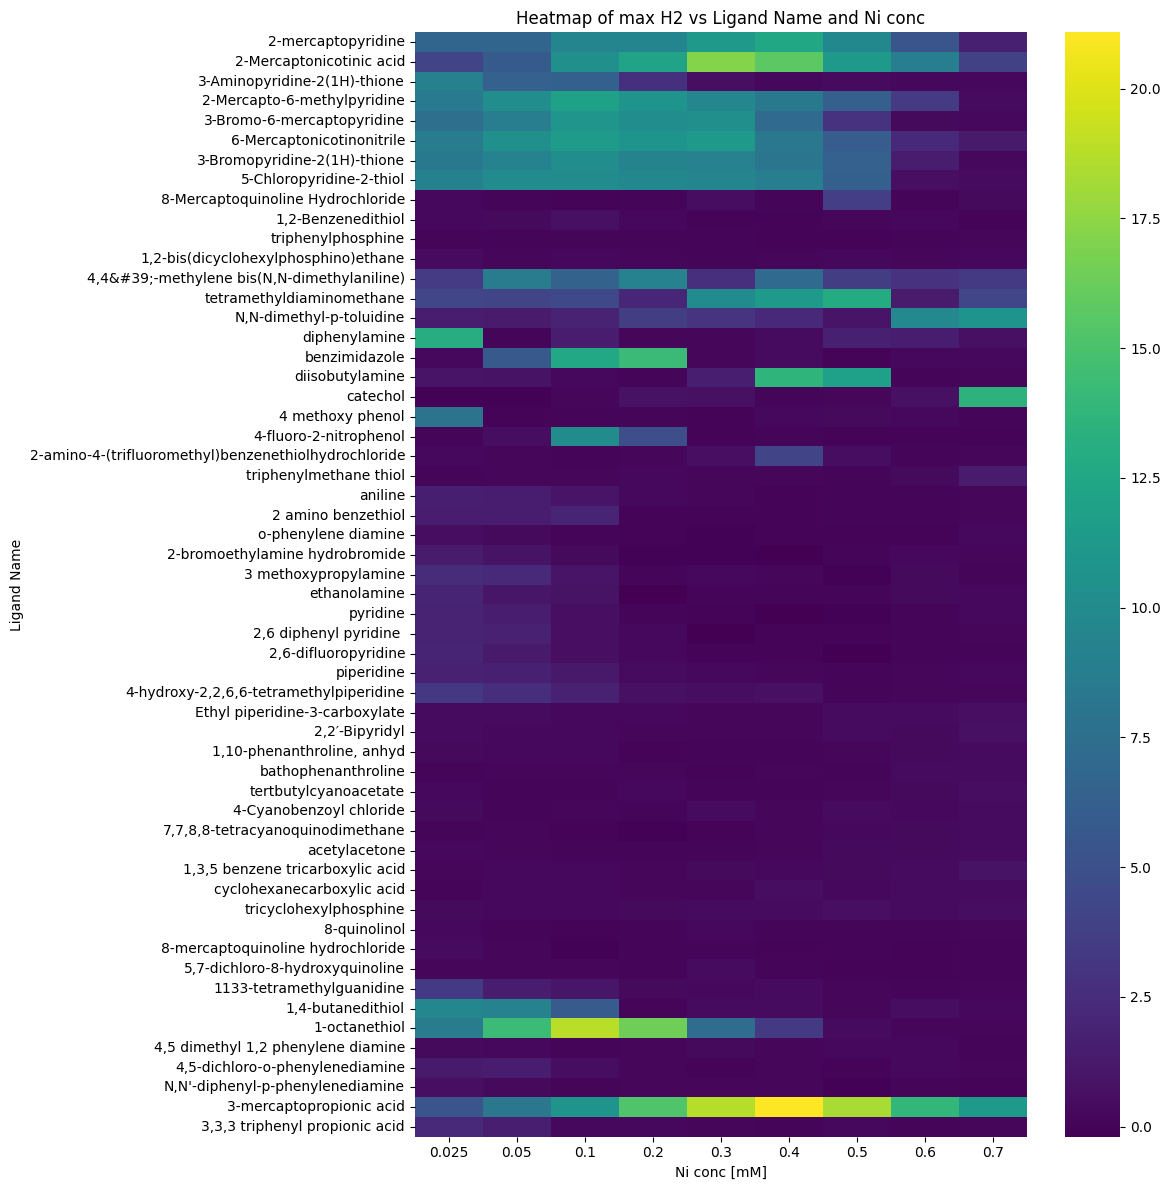

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric part for sorting
df["SampleNum"] = df["Sample ID"].str.extract(r'(\d+)').astype(int)

# Pivot table: rows = SampleNum, columns = Ni conc, values = max h2
heatmap_data = df.pivot_table(
    index=["SampleNum", "Ligand Name"],  # use ligand name here for display
    columns="Ni conc [mM]",
    values="max h2 (umol)",
    aggfunc="mean"
).sort_index(level="SampleNum")  # sorts by numeric order

# For the heatmap, use ligand names as the y-axis
heatmap_data_ligand = heatmap_data.copy()
heatmap_data_ligand.index = heatmap_data_ligand.index.get_level_values(1)  # Ligand Name

plt.figure(figsize=(12, 12))
ax = sns.heatmap(heatmap_data_ligand, cmap="viridis", annot=False)

plt.title("Heatmap of max H2 vs Ligand Name and Ni conc")
plt.ylabel("Ligand Name")
plt.xlabel("Ni conc [mM]")
plt.tight_layout()
plt.show()

### Visualize the mean value of the max H2 produced across all the Ni concentrations for each Ligand

#### It is good that this mean value is showing variablility across the different ligands. This means that we can use it as a target for our model.

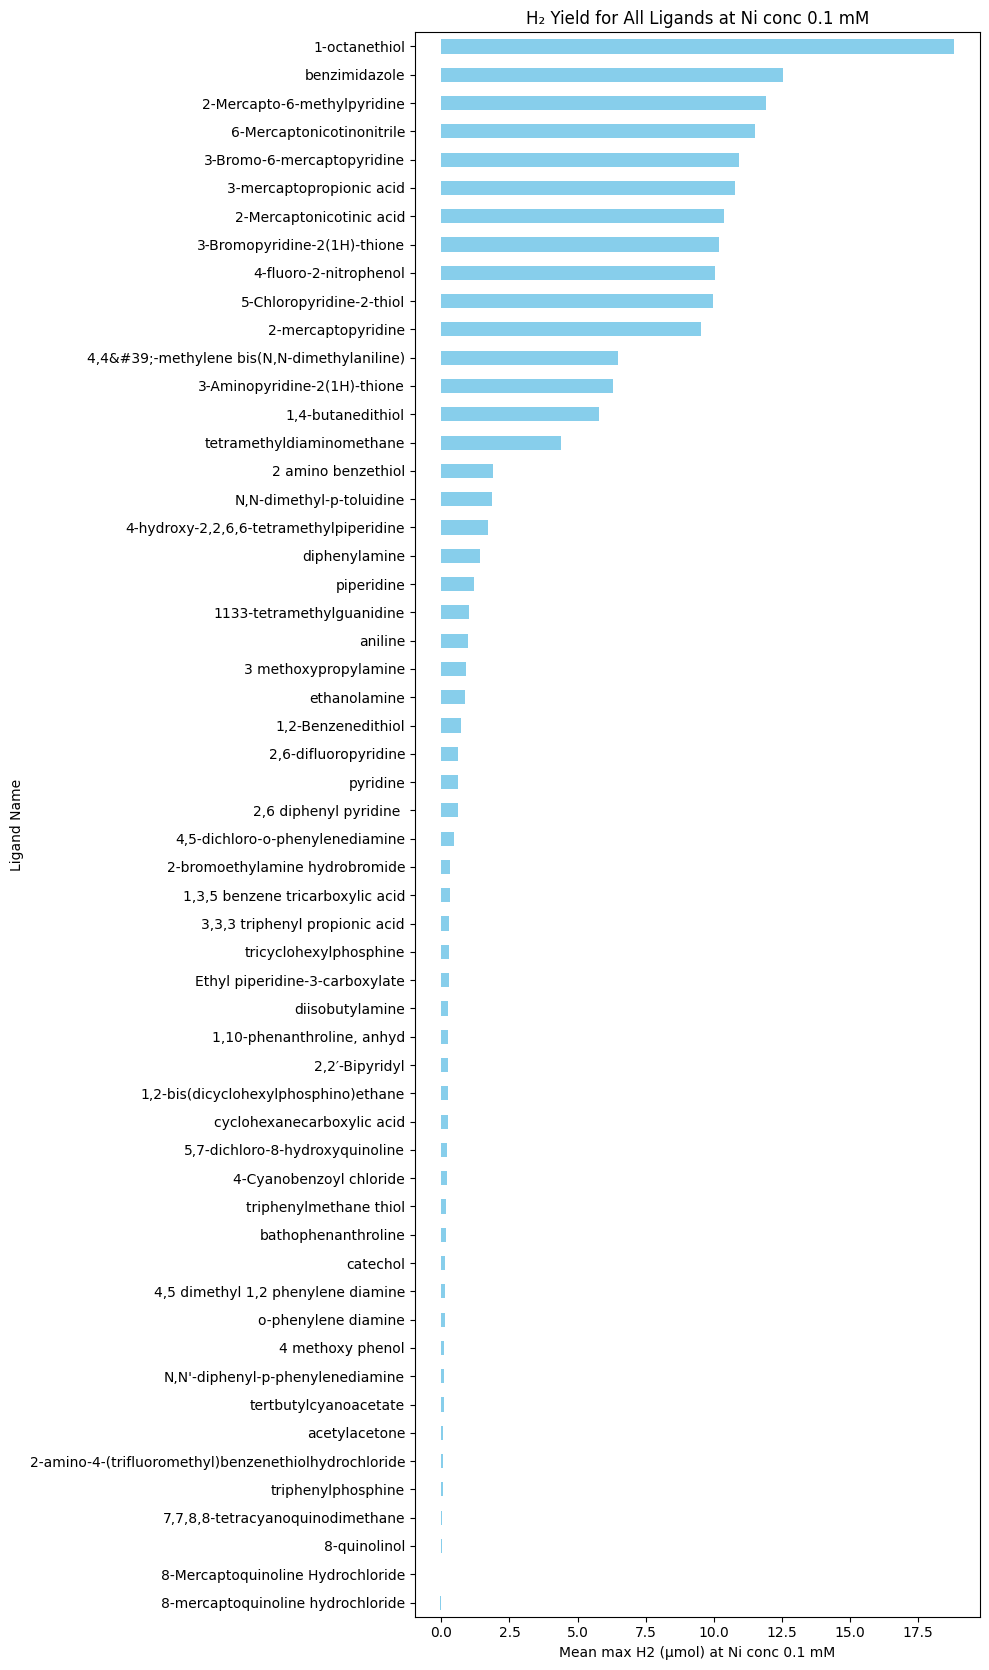

In [ ]:
import matplotlib.pyplot as plt

# Filter for Ni conc = 0.1 mM
df_ni01 = df[df["Ni conc [mM]"] == 0.1]

# Compute mean max h2 for each ligand at Ni conc 0.1
ligand_h2 = df_ni01.groupby("Ligand Name")["max h2 (umol)"].mean().sort_values(ascending=False)

# Horizontal bar plot
plt.figure(figsize=(10, len(ligand_h2) * 0.3))  # adjust height based on number of ligands
ligand_h2.plot(kind="barh", color="skyblue")
plt.xlabel("Mean max H2 (µmol) at Ni conc 0.1 mM")
plt.ylabel("Ligand Name")
plt.title("H₂ Yield for All Ligands at Ni conc 0.1 mM")
plt.gca().invert_yaxis()  # highest at the top
plt.tight_layout()
plt.show()